In [169]:
import numpy as np
import pandas as pd
import gender_guesser.detector as gender

from functions.utils import *
#from functions.env_colors import *
from functions.location import *
from functions.menus import *
from functions.preprocessement import *
from functions.utils import *
from langdetect import detect as langdetector

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
pd.set_option('display.max_columns', None)

In [99]:
#pd.set_option('display.max_rows', None)

In [100]:
data = pd.read_csv('data/restaurants_data_preprocessed_bruno_12.11.2023.csv', index_col=0)

In [101]:
data

,address,averagePrice,chefName,cuisine,currency,customerPhotos/0,customerPhotos/1,customerPhotos/2,customerPhotos/3,customerPhotos/4,customerPhotos/5,customerPhotos/6,customerPhotos/7,customerPhotos/8,customerPhotos/9,customerPhotos/10,customerPhotos/11,customerPhotos/12,customerPhotos/13,customerPhotos/14,customerPhotos/15,customerPhotos/16,customerPhotos/17,customerPhotos/18,customerPhotos/19,description,hasLoyaltyProgram,isBookable,latitude,location,longitude,maxPartySize,name,offer,openingHours,paymentAccepted/0,paymentAccepted/1,paymentAccepted/2,paymentAccepted/3,paymentAccepted/4,paymentAccepted/5,paymentAccepted/6,paymentAccepted/7,paymentAccepted/8,phone,photo,photos/0,photos/1,photos/2,photos/3,photos/4,photos/5,photos/6,photos/7,photos/8,photos/9,photos/10,photos/11,photos/12,photos/13,photos/14,photos/15,photos/16,photos/17,photos/18,photos/19,photos/20,photos/21,photos/22,photos/23,photos/24,photos/25,photos/26,photos/27,photos/28,photos/29,photos/30,photos/31,photos/32,photos/33,photos/34,photos/35,photos/36,photos/37,photos/38,photos/39,photos/40,photos/41,photos/42,photos/43,photos/44,photos/45,photos/46,photos/47,photos/48,photos/49,photos/50,photos/51,photos/52,photos/53,photos/54,photos/55,photos/56,photos/57,photos/58,photos/59,photos/60,photos/61,photos/62,photos/63,photos/64,photos/65,photos/66,photos/67,photos/68,photos/69,photos/70,photos/71,photos/72,photos/73,photos/74,photos/75,photos/76,photos/77,photos/78,photos/79,photos/80,photos/81,photos/82,photos/83,photos/84,photos/85,photos/86,photos/87,photos/88,photos/89,photos/90,radius,ratingValue,reviewCount,reviewList/0/ambienceRatingValue,reviewList/0/date,reviewList/0/foodRatingValue,reviewList/0/ratingValue,reviewList/0/review,reviewList/0/reviewerName,reviewList/0/serviceRatingValue,reviewList/1/ambienceRatingValue,reviewList/1/date,reviewList/1/foodRatingValue,reviewList/1/ratingValue,reviewList/1/review,reviewList/1/reviewerName,reviewList/1/serviceRatingValue,reviewList/2/ambienceRatingValue,reviewList/2/date,reviewList/2/foodRatingValue,reviewList/2/ratingValue,reviewList/2/review,reviewList/2/reviewerName,reviewList/2/serviceRatingValue,reviewList/3/ambienceRatingValue,reviewList/3/date,reviewList/3/foodRatingValue,reviewList/3/ratingValue,reviewList/3/review,reviewList/3/reviewerName,reviewList/3/serviceRatingValue,reviewList/4/ambienceRatingValue,reviewList/4/date,reviewList/4/foodRatingValue,reviewList/4/ratingValue,reviewList/4/review,reviewList/4/reviewerName,reviewList/4/serviceRatingValue,reviewList/5/ambienceRatingValue,reviewList/5/date,reviewList/5/foodRatingValue,reviewList/5/ratingValue,reviewList/5/review,reviewList/5/reviewerName,reviewList/5/serviceRatingValue,reviewList/6/ambienceRatingValue,reviewList/6/date,reviewList/6/foodRatingValue,reviewList/6/ratingValue,reviewList/6/review,reviewList/6/reviewerName,reviewList/6/serviceRatingValue,reviewList/7/ambienceRatingValue,reviewList/7/date,reviewList/7/foodRatingValue,reviewList/7/ratingValue,reviewList/7/review,reviewList/7/reviewerName,reviewList/7/serviceRatingValue,reviewList/8/ambienceRatingValue,reviewList/8/date,reviewList/8/foodRatingValue,reviewList/8/ratingValue,reviewList/8/review,reviewList/8/reviewerName,reviewList/8/serviceRatingValue,reviewList/9/ambienceRatingValue,reviewList/9/date,reviewList/9/foodRatingValue,reviewList/9/ratingValue,reviewList/9/review,reviewList/9/reviewerName,reviewList/9/serviceRatingValue,reviewList/10/ambienceRatingValue,reviewList/10/date,reviewList/10/foodRatingValue,reviewList/10/ratingValue,reviewList/10/review,reviewList/10/reviewerName,reviewList/10/serviceRatingValue,reviewList/11/ambienceRatingValue,reviewList/11/date,reviewList/11/foodRatingValue,reviewList/11/ratingValue,reviewList/11/review,reviewList/11/reviewerName,reviewList/11/serviceRatingValue,reviewList/12/ambienceRatingValue,reviewList/12/date,reviewList/12/foodRatingValue,reviewList/12/ratingValue,reviewList/12/review,reviewList/12/reviewerName,reviewList/12/serviceRat

In [102]:
restaurant_reviews = data[['reviewList/0/ambienceRatingValue','reviewList/0/date', 'reviewList/0/foodRatingValue', 'reviewList/0/ratingValue', 'reviewList/0/review',
 'reviewList/0/reviewerName', 'reviewList/0/serviceRatingValue', 'reviewList/1/ambienceRatingValue', 'reviewList/1/date', 'reviewList/1/foodRatingValue', 'reviewList/1/ratingValue',
 'reviewList/1/review', 'reviewList/1/reviewerName', 'reviewList/1/serviceRatingValue', 'reviewList/2/ambienceRatingValue', 'reviewList/2/date', 'reviewList/2/foodRatingValue',
 'reviewList/2/ratingValue', 'reviewList/2/review', 'reviewList/2/reviewerName', 'reviewList/2/serviceRatingValue', 'reviewList/3/ambienceRatingValue','reviewList/3/date',
 'reviewList/3/foodRatingValue', 'reviewList/3/ratingValue', 'reviewList/3/review', 'reviewList/3/reviewerName', 'reviewList/3/serviceRatingValue', 'reviewList/4/ambienceRatingValue',
 'reviewList/4/date','reviewList/4/foodRatingValue', 'reviewList/4/ratingValue', 'reviewList/4/review', 'reviewList/4/reviewerName', 'reviewList/4/serviceRatingValue',
 'reviewList/5/ambienceRatingValue', 'reviewList/5/date', 'reviewList/5/foodRatingValue', 'reviewList/5/ratingValue', 'reviewList/5/review', 'reviewList/5/reviewerName',
 'reviewList/5/serviceRatingValue', 'reviewList/6/ambienceRatingValue', 'reviewList/6/date', 'reviewList/6/foodRatingValue', 'reviewList/6/ratingValue', 'reviewList/6/review',
 'reviewList/6/reviewerName', 'reviewList/6/serviceRatingValue', 'reviewList/7/ambienceRatingValue', 'reviewList/7/date', 'reviewList/7/foodRatingValue', 'reviewList/7/ratingValue',
 'reviewList/7/review', 'reviewList/7/reviewerName', 'reviewList/7/serviceRatingValue', 'reviewList/8/ambienceRatingValue', 'reviewList/8/date', 'reviewList/8/foodRatingValue',
 'reviewList/8/ratingValue', 'reviewList/8/review', 'reviewList/8/reviewerName', 'reviewList/8/serviceRatingValue', 'reviewList/9/ambienceRatingValue', 'reviewList/9/date',
 'reviewList/9/foodRatingValue', 'reviewList/9/ratingValue', 'reviewList/9/review', 'reviewList/9/reviewerName', 'reviewList/9/serviceRatingValue', 'reviewList/10/ambienceRatingValue',
 'reviewList/10/date', 'reviewList/10/foodRatingValue', 'reviewList/10/ratingValue', 'reviewList/10/review', 'reviewList/10/reviewerName', 'reviewList/10/serviceRatingValue',
 'reviewList/11/ambienceRatingValue', 'reviewList/11/date', 'reviewList/11/foodRatingValue', 'reviewList/11/ratingValue', 'reviewList/11/review', 'reviewList/11/reviewerName',
 'reviewList/11/serviceRatingValue', 'reviewList/12/ambienceRatingValue', 'reviewList/12/date', 'reviewList/12/foodRatingValue', 'reviewList/12/ratingValue', 'reviewList/12/review',
 'reviewList/12/reviewerName', 'reviewList/12/serviceRatingValue', 'reviewList/13/ambienceRatingValue', 'reviewList/13/date', 'reviewList/13/foodRatingValue', 'reviewList/13/ratingValue',
 'reviewList/13/review', 'reviewList/13/reviewerName', 'reviewList/13/serviceRatingValue', 'reviewList/14/ambienceRatingValue', 'reviewList/14/date',
 'reviewList/14/foodRatingValue', 'reviewList/14/ratingValue', 'reviewList/14/review', 'reviewList/14/reviewerName', 'reviewList/14/serviceRatingValue', 'reviewList/15/ambienceRatingValue',
 'reviewList/15/date', 'reviewList/15/foodRatingValue', 'reviewList/15/ratingValue', 'reviewList/15/review', 'reviewList/15/reviewerName', 'reviewList/15/serviceRatingValue',
 'reviewList/16/ambienceRatingValue', 'reviewList/16/date', 'reviewList/16/foodRatingValue', 'reviewList/16/ratingValue', 'reviewList/16/review', 'reviewList/16/reviewerName',
 'reviewList/16/serviceRatingValue', 'reviewList/17/ambienceRatingValue', 'reviewList/17/date', 'reviewList/17/foodRatingValue', 'reviewList/17/ratingValue', 'reviewList/17/review',
 'reviewList/17/reviewerName', 'reviewList/17/serviceRatingValue', 'reviewList/18/ambienceRatingValue', 'reviewList/18/date', 'reviewList/18/foodRatingValue', 'reviewList/18/ratingValue',
 'reviewList/18/review', 'reviewList/18/reviewerName', 'reviewList/18/serviceRatingValue', 'reviewList/19/ambienceRatingValue', 'reviewList/19/date', 'reviewList/19/foodRatingValue',
 'reviewList/19/ratingValue', 'reviewList/19/review', 'reviewList/19/reviewerName', 'reviewList/19/serviceRatingValue']].copy()

In [103]:
print(list(restaurant_reviews.columns))

['reviewList/0/ambienceRatingValue', 'reviewList/0/date', 'reviewList/0/foodRatingValue', 'reviewList/0/ratingValue', 'reviewList/0/review', 'reviewList/0/reviewerName', 'reviewList/0/serviceRatingValue', 'reviewList/1/ambienceRatingValue', 'reviewList/1/date', 'reviewList/1/foodRatingValue', 'reviewList/1/ratingValue', 'reviewList/1/review', 'reviewList/1/reviewerName', 'reviewList/1/serviceRatingValue', 'reviewList/2/ambienceRatingValue', 'reviewList/2/date', 'reviewList/2/foodRatingValue', 'reviewList/2/ratingValue', 'reviewList/2/review', 'reviewList/2/reviewerName', 'reviewList/2/serviceRatingValue', 'reviewList/3/ambienceRatingValue', 'reviewList/3/date', 'reviewList/3/foodRatingValue', 'reviewList/3/ratingValue', 'reviewList/3/review', 'reviewList/3/reviewerName', 'reviewList/3/serviceRatingValue', 'reviewList/4/ambienceRatingValue', 'reviewList/4/date', 'reviewList/4/foodRatingValue', 'reviewList/4/ratingValue', 'reviewList/4/review', 'reviewList/4/reviewerName', 'reviewList/4/

In [104]:
restaurant_reviews.reset_index(inplace=True)

In [105]:
clients2 = pd.melt(restaurant_reviews, id_vars='restaurantID', value_vars= [f'reviewList/{str(i)}/reviewerName' for i in range(20)])

for col in [ 'ambienceRatingValue', 'foodRatingValue', 'date', 'ratingValue', 'review', 'serviceRatingValue']:
    temp = pd.melt(restaurant_reviews, id_vars='restaurantID', value_vars= [f'reviewList/{str(i)}/{col}' for i in range(20)])
    temp.rename(columns={'value': col}, inplace=True)
    clients2 = pd.concat([clients2, temp[col]], axis=1)

clients2.drop(columns=['variable'], inplace=True)
clients2.dropna(how='all', subset=['ambienceRatingValue', 'foodRatingValue', 'date', 'ratingValue', 'review', 'serviceRatingValue'], inplace=True)

In [106]:
clients2.groupby('restaurantID').count()

,value,ambienceRatingValue,foodRatingValue,date,ratingValue,review,serviceRatingValue
restaurantID,,,,,,,
64373,20,20,20,20,20,20,20
64396,20,20,20,20,20,20,20
64398,20,20,20,20,20,20,20
64399,20,20,20,20,20,20,20
64406,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...
807102,1,1,1,1,1,1,1
807157,1,1,1,1,1,1,1
807216,1,1,1,1,1,1,1


In [107]:
clients2.drop(list(clients2[clients2['value'] == '- -'].index), axis=0, inplace=True)

In [108]:
d = gender.Detector()

clients2['gender'] = clients2['value'].apply(lambda x: d.get_gender(x.split()[0].lower().capitalize()))

gender_mapping = {'female': 'female', 'male': 'male', 'mostly_female': 'female', 'mostly_male': 'male', 'andy': 'unknown', 'unknown': 'unknown'}

In [109]:
clients2

,restaurantID,value,ambienceRatingValue,foodRatingValue,date,ratingValue,review,serviceRatingValue,gender
0,730060,Rui Jorge M.,10.0,10.0,2023-08-08T19:30:00.000Z,10.0,"Espaço agradável, simpatia e interacção por pa...",10.0,male
1,805058,Lara P.,8.0,2.0,2023-09-23T20:30:00.000Z,3.5,ninguém gostou,2.0,female
2,712669,Isabel D.,10.0,10.0,2023-09-16T19:30:00.000Z,10.0,Sushi muito fresco e delicioso. Ambiente agra...,10.0,female
3,576521,Thalyta C.,8.0,10.0,2023-09-27T20:00:00.000Z,9.0,Comida excelente,8.0,unknown
4,802974,Rachel B.,6.0,10.0,2023-09-01T18:30:00.000Z,8.5,Bit disappointed that what we ordered wasn't a...,8.0,female
...,...,...,...,...,...,...,...,...,...
30400,741093,Ana Raquel R.,10.0,10.0,2022-08-31T19:00:00.000Z,10.0,Experiência incrível.,10.0,female
30401,65191,Sofia P.,8.0,10.0,2017-07-04T12:30:00.000Z,9.0,The food was really good but I considered it t...,8.0,female
30402,587893,Raphael S.,10.0,8.0,2022-04-24T12:00:00.000Z,8.5,"Bom restaurante, bom ambiente e bom preço.",8.0,male
30406,733529,Bruno R.,10.0,10.0,2022-07-13T19:00:00.000Z,10.0,Comida excelente,10.0,male


In [110]:
visited_restaurants = clients2.groupby('value')['restaurantID'].apply(list)

In [111]:
clients3 = clients2.groupby('value').agg({'gender': 'first', 'restaurantID': 'nunique',
                                          'ambienceRatingValue': 'mean', 'foodRatingValue': 'mean', 'serviceRatingValue': 'mean', 'date': 'count'}).reset_index()

In [112]:
client_reviews = clients2.groupby('value')['review'].apply(list)

In [113]:
clients3 = pd.merge(clients3, visited_restaurants, on='value', how='left')

In [114]:
clients3.rename(columns={'restaurantID_x': 'nb_restaurants_visited', 'restaurantID_y': 'restaurants_visited', 'date':'num_reviews'}, inplace=True)

In [115]:
clients3

,value,gender,nb_restaurants_visited,ambienceRatingValue,foodRatingValue,serviceRatingValue,num_reviews,restaurants_visited
0,- P.,unknown,2,7.333333,8.666667,7.333333,3,"[201820, 201820, 387511]"
1,A c.,unknown,1,6.000000,2.000000,10.000000,1,[528521]
2,A. Ana Rita C.,unknown,1,8.000000,8.000000,10.000000,1,[664311]
3,A. C.,unknown,1,10.000000,4.000000,6.000000,1,[316753]
4,A.C. V.,unknown,1,10.000000,10.000000,10.000000,1,[730838]
...,...,...,...,...,...,...,...,...
11699,Светлана О.,unknown,1,10.000000,10.000000,10.000000,1,[750413]
11700,אורי מ.,unknown,1,10.000000,10.000000,10.000000,1,[590849]
11701,恩瑀 曹,unknown,1,10.000000,10.000000,10.000000,1,[748877]
11702,김 수빈,unknown,1,10.000000,10.000000,10.000000,1,[748296]


In [116]:
clients3 = pd.merge(clients3, client_reviews, on='value', how='left')

In [118]:
clients3.rename(columns={'value': 'reviewer_name'}, inplace=True)

In [119]:
clients3

,reviewer_name,gender,nb_restaurants_visited,ambienceRatingValue,foodRatingValue,serviceRatingValue,num_reviews,restaurants_visited,review
0,- P.,unknown,2,7.333333,8.666667,7.333333,3,"[201820, 201820, 387511]",[⚠️We used to invite our friends to this resta...
1,A c.,unknown,1,6.000000,2.000000,10.000000,1,[528521],[Viande pas fraiche \r\nService ok]
2,A. Ana Rita C.,unknown,1,8.000000,8.000000,10.000000,1,[664311],"[Comida saborosa, tradicional, mas com toque m..."
3,A. C.,unknown,1,10.000000,4.000000,6.000000,1,[316753],[Espaço acolhedor e informal. Batata doce às r...
4,A.C. V.,unknown,1,10.000000,10.000000,10.000000,1,[730838],"[Muito agradável, excelente serviço e proprie..."
...,...,...,...,...,...,...,...,...,...
11699,Светлана О.,unknown,1,10.000000,10.000000,10.000000,1,[750413],"[It was amazing! Food, service, atmosphere ???..."
11700,אורי מ.,unknown,1,10.000000,10.000000,10.000000,1,[590849],[special experience! the concept is special an...
11701,恩瑀 曹,unknown,1,10.000000,10.000000,10.000000,1,[748877],[The food were amazing! It's a great place to ...
11702,김 수빈,unknown,1,10.000000,10.000000,10.000000,1,[748296],[The best restaurant in Faro. As an Asian pers...


In [120]:
def find_average_price(restaurants_visited):
    avg_price = 0
    counter = 0
    for restaurant in restaurants_visited:
        if restaurant in list(data.index):
            restaurant_price = data.loc[restaurant, 'averagePrice']
            avg_price += restaurant_price
            counter += 1
        else:
            pass
    if counter != 0:
        return avg_price/counter
    else:
        return np.nan

In [121]:
clients3['average_price'] = clients3['restaurants_visited'].apply(lambda x: find_average_price(x))

In [122]:
clients3['average_reviews'] = clients3['num_reviews']/clients3['nb_restaurants_visited']

In [123]:
def extract_restaurant_info(restaurants_visited, info):
    info_list = []
    if info == 'coordinates':
        for restaurant in restaurants_visited:
            if restaurant in list(data.index):
                lat = data.loc[restaurant, 'latitude']
                long = data.loc[restaurant, 'longitude']
                info_list.append((lat, long))
            else:
                pass
    else:
        for restaurant in restaurants_visited:
            if restaurant in list(data.index):
                restaurant_info = data.loc[restaurant, info]
                if not pd.isna(restaurant_info):
                    info_list.append(restaurant_info)
            else:
                pass
    return list(set(info_list))

In [124]:
clients3['visited_cuisines'] = clients3['restaurants_visited'].apply(lambda x: extract_restaurant_info(x, 'cuisine'))
clients3['visited_locations'] = clients3['restaurants_visited'].apply(lambda x: extract_restaurant_info(x, 'location'))
clients3['visited_style'] = clients3['restaurants_visited'].apply(lambda x: extract_restaurant_info(x, 'style'))

In [125]:
clients3['visited_coordinates'] = clients3['restaurants_visited'].apply(lambda x: extract_restaurant_info(x, 'coordinates'))

In [126]:
clients3['midpoint_coordinates'] = clients3['visited_coordinates'].apply(lambda locations: (np.mean([location[0] for location in locations]), np.mean([location[1] for location in locations])))

In [130]:
clients3['review'] = clients3['review'].apply(lambda x: [standardize_text(review) for review in x])

In [214]:
def join_reviews(reviews):
    for i in range(len(reviews)-1):
        if isinstance(reviews[i], type(None)):
            del reviews[i]
    return ' '.join(reviews)

In [215]:
clients3['review_language'] = clients3['review'].apply(lambda x: join_reviews(x))

In [216]:
def detect_language(string_reviews):
    try:
        if isinstance(string_reviews, type(None)):
            return "Not Available"
        elif isinstance(string_reviews, str) and len(string_reviews) >= 30:
            return langdetector(string_reviews)
        else:
            return "Not Available"
    except:
        return "Not Available"

In [217]:
clients3['review_language'] = clients3['review_language'].apply(lambda x: detect_language(x))

In [29]:
#LATITUDES E LONGITUDES ESTRANHAS!
#data[data['longitude']==-99.50084726]

In [30]:
#import folium

# Create a map centered at a specific location
#map_center = [latitude, longitude]  # Replace with the desired center coordinates
#my_map = folium.Map(location=map_center, zoom_start=10)

# Iterate through locations and add markers to the map
#for location in clients['visitedLocations']:
#    for lat, lon in location:
#        folium.Marker([lat, lon]).add_to(my_map)

# Save the map as an HTML file
#my_map.save('my_map.html')

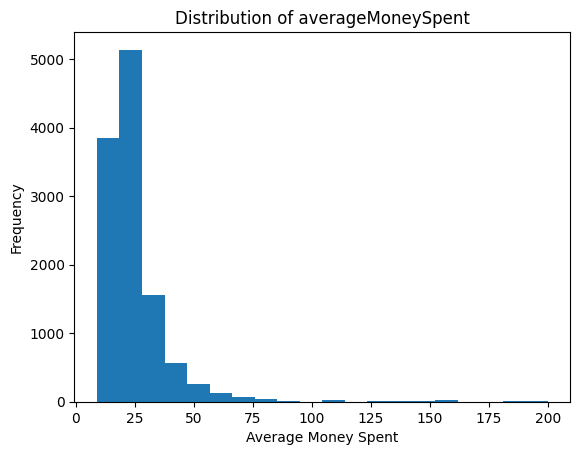

In [219]:
import matplotlib.pyplot as plt

# Plotting a histogram
plt.hist(clients3['average_price'], bins=20)
plt.title('Distribution of averageMoneySpent')
plt.xlabel('Average Money Spent')
plt.ylabel('Frequency')
plt.show()

In [220]:
# Create a new variable 'age' based on a hypothetical relationship
clients3['age'] = (20 + 0.5 * clients3['average_price'] + np.random.normal(-5, 5, len(clients3))).astype(int)

In [222]:
clients3.loc[clients3['age'] > 90, 'age'] = clients3['age'].mean()
clients3.loc[clients3['age'] < 18, 'age'] = np.random.uniform(18, 24, len(clients3[clients3['age'] < 18]))

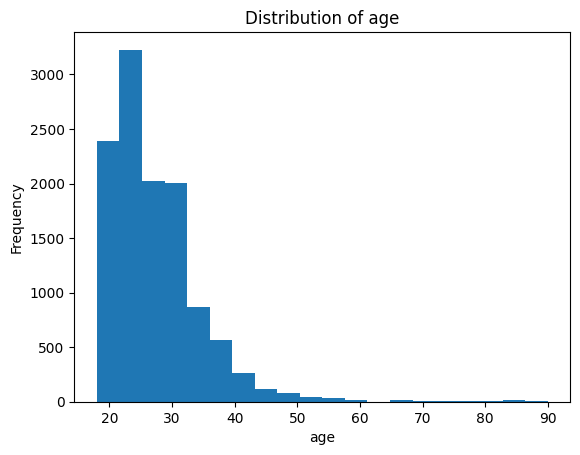

In [223]:
# Plotting a histogram
plt.hist(clients3['age'], bins=20)
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

In [224]:
# https://www.statista.com/statistics/937317/tobacco-smoking-prevalence-globally-by-age/
distributions = [0.142, 0.217, 0.263, 0.285, 0.268, 0.227, 0.18, 0.127]


def assign_smoker(age):
    if 15 <= age <= 24:
        return np.random.choice([0, 1], p=[1 - distributions[0], distributions[0]])
    elif 25 <= age <= 34:
        return np.random.choice([0, 1], p=[1 - distributions[1], distributions[1]])
    elif 35 <= age <= 44:
        return np.random.choice([0, 1], p=[1 - distributions[2], distributions[2]])
    elif 45 <= age <= 54:
        return np.random.choice([0, 1], p=[1 - distributions[3], distributions[3]])
    elif 55 <= age <= 64:
        return np.random.choice([0, 1], p=[1 - distributions[4], distributions[4]])
    elif 65 <= age <= 74:
        return np.random.choice([0, 1], p=[1 - distributions[5], distributions[5]])
    elif 75 <= age <= 84:
        return np.random.choice([0, 1], p=[1 - distributions[6], distributions[6]])
    elif age >= 85:
        return np.random.choice([0, 1], p=[1 - distributions[7], distributions[7]])
    else:
        return np.nan  # Handle cases where age is outside specified ranges

# Apply the function to create the "smoker" variable
clients3['smoker'] = clients3['age'].apply(assign_smoker)

In [225]:
clients3.columns

Index(['reviewer_name', 'gender', 'nb_restaurants_visited',
       'ambienceRatingValue', 'foodRatingValue', 'serviceRatingValue',
       'num_reviews', 'restaurants_visited', 'review', 'average_price',
       'average_reviews', 'visited_cuisines', 'visited_locations',
       'visited_style', 'visited_coordinates', 'midpoint_coordinates',
       'review_language', 'age', 'smoker'],
      dtype='object')

In [229]:
language_mapping = {'af': 'afrikaans', 'ar': 'arabic', 'bg':'bulgarian', 'bn': 'bengali', 
                    'ca': 'catalan', 'cs': 'czech', 'cy': 'welsh', 
                    'da': 'danish', 'de': 'german', 'el': 'greek',
                    'en': 'english', 'es': 'spanish', 'et': 'estonian',
                    'fa': 'persian', 'fi': 'finnish', 'fr': 'french',
                    'gu': 'gujarati', 'he': 'hebrew', 'hi': 'hindi',
                    'hr': 'croatian', 'hu': 'hungarian', 'id': 'indonesian',
                    'it': 'italian', 'ja': 'japanese', 'kn': 'kannada',
                    'ko': 'korean', 'lt': 'lithuanian', 'lv': 'latvian',
                    'mk': 'macedonian', 'ml': 'malayalam', 'mr': 'marathi',
                    'ne': 'nepali', 'nl': 'dutch', 'no': 'norwegian',
                    'pa': 'punjabi', 'pl': 'polish', 'pt': 'portuguese',
                    'ro': 'romanian', 'ru': 'russian', 'sk': 'slovak',
                    'sl': 'slovene', 'so': 'somali', 'sq': 'albanian',
                    'sv': 'swedish', 'sw': 'swahili', 'ta': 'tamil',
                    'te': 'telugu', 'th': 'thai', 'tl': 'tagalog',
                    'tr': 'turkish', 'uk': 'ukrainian', 'ur': 'urdu',
                    'vi': 'vietnamese', 'zh-cn': 'chinese', 'zh-tw': 'chinese', 'Not Available': np.nan}

In [230]:
clients3['review_language'] = clients3['review_language'].apply(lambda x: language_mapping[x])